In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

C:\Users\Muhammad_Talha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'C:\Users\Muhammad_Talha\Downloads\COHORT 7\Week 1 + 2 + 3\Untitled Folder\SLR_house_prices.csv')

In [3]:
df.head()

,area,price
0,1360.0,75561.009869
1,4272.0,197449.640308
2,3592.0,180621.795096
3,966.0,45234.416477
4,4926.0,232342.452693


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    980 non-null    float64
 1   price   972 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
area_mean = df['area'].mean()
price_mean = df['price'].mean()
print(area_mean,'\t',price_mean)

2806.980612244898 	 141055.5696082319


In [7]:
df['area'] = np.where(df['area'].isnull(),area_mean,df['area'])
df['price'] = np.where(df['price'].isnull(),price_mean,df['price'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   float64
 1   price   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x,y=df[['area']],df['price']

In [11]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [12]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(800, 1) (200, 1) (800,) (200,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()


In [15]:
model.fit(train_x,train_y)

LinearRegression()

In [16]:
pred_y = model.predict(test_x)

In [17]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(test_y,pred_y)

10676.666902686497

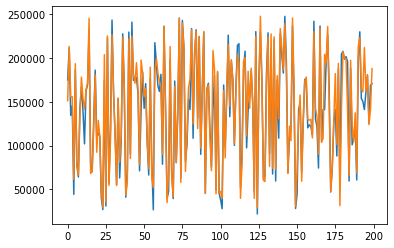

In [18]:
plt.plot(range( 0,len(test_y)),test_y)
plt.plot(range (0,len(test_y)),pred_y)

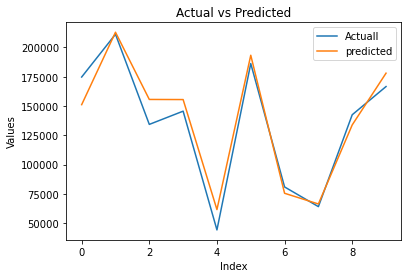

In [19]:
plt.plot(range( 0,10),test_y[0:10],label ='Actuall')
plt.plot(range (0,10),pred_y[0:10],label = 'predicted' )
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [20]:
acuracy = r2_score(test_y,pred_y)
acuracy

0.9294799889878772